# •	Data Exploration and visualization:

a)	Explain the data. Find the features in the dataset. Print their names and dimensions. 




In [26]:
import pandas as pd

url = "https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/Uber-Jan-Feb-FOIL.csv"
data = pd.read_csv(url)
data

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [27]:
dataNew = data[['active_vehicles','trips']]

In [28]:
#to find the features in the dataset
print(data.columns)

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')


In [29]:
#to find the shape of the datastet
print(data.shape)

(354, 4)


b)	Plot the data distribution of a few features. Discuss their mean and variance.

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

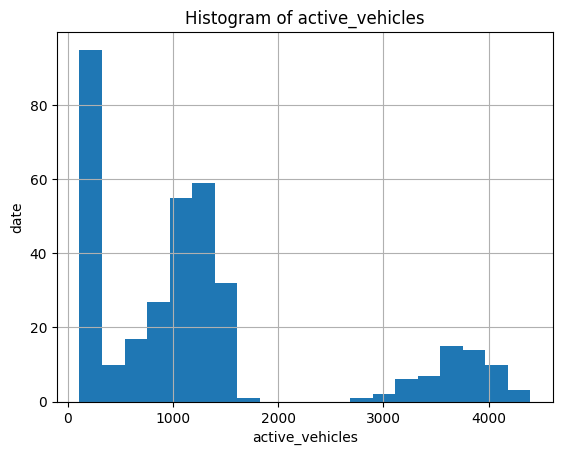

In [31]:
data['active_vehicles'].hist(bins=20)
plt.xlabel('active_vehicles')
plt.ylabel('date')
plt.title('Histogram of active_vehicles')
plt.show()

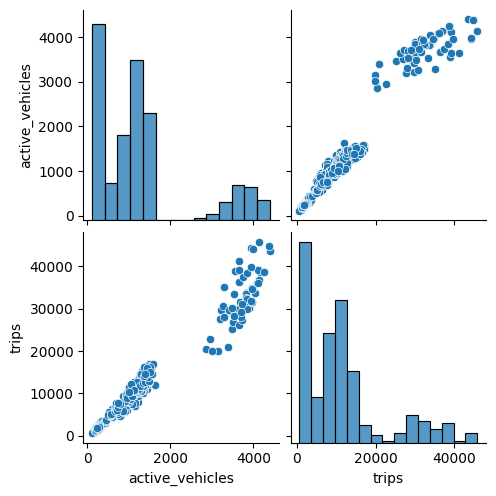

In [32]:
sns.pairplot(data[['active_vehicles', 'trips']])
plt.show()

In [33]:
#mean of dataset
mean = data.mean()
print(mean)

active_vehicles     1307.435028
trips              11667.316384
dtype: float64


/var/folders/yd/0_xjh7m511nbmvmbh8xgbtqr0000gn/T/ipykernel_2486/4191436771.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean()


In [34]:
#mean of one of the column
mean_active_vehicles = data['active_vehicles'].mean()
print(mean_active_vehicles)

1307.4350282485875


In [35]:
#variance of the whole data set
variance = data.var()
print(variance)

active_vehicles    1.351431e+06
trips              1.133860e+08
dtype: float64


/var/folders/yd/0_xjh7m511nbmvmbh8xgbtqr0000gn/T/ipykernel_2486/3217976520.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = data.var()


In [36]:
variance_active_vehicles = data['active_vehicles'].var()
print(variance_active_vehicles)

1351430.9546902257


# •	Data Pre-processing:

a)	Data cleaning: Find missing data. Remove them and justify your choice

In [37]:
#checking missing value
missing_data = data.isnull().sum()
print(missing_data)

#our given dataset does not have any missing value

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64


b)	Data Cleaning: Identify noise in the data. How did you identify the noise? Justify and demonstrate the technique you would use to reduce noise. 

In [38]:
#Machine learning algorithms: You can use machine learning algorithms to identify noise in the dataset. 
#For example, you can use clustering algorithms such as k-means to cluster the 
#data and identify any outliers or noise points that are far from the clusters.

from sklearn.cluster import KMeans
# cluster data using k-means

threshold = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataNew)

# identify noise points that are far from the clusters
distances = kmeans.transform(dataNew)
noise_indices = distances.max(axis=1) > threshold
clean_data = dataNew[~noise_indices]



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c)	Data transformations:  Perform standardizations and normalization. Justify your chosen normalization method. 

standardizations

In [39]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


scaled_data = scaler.fit_transform(dataNew)

scaled_data = pd.DataFrame(scaled_data, columns=dataNew.columns)


print(scaled_data.mean())
print(scaled_data.std())

active_vehicles    2.007183e-17
trips              0.000000e+00
dtype: float64
active_vehicles    1.001415
trips              1.001415
dtype: float64


normalization

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


normalized_data = scaler.fit_transform(dataNew)


normalized_data = pd.DataFrame(normalized_data, columns=dataNew.columns)

print(normalized_data.min())
print(normalized_data.max())

active_vehicles    0.0
trips              0.0
dtype: float64
active_vehicles    1.0
trips              1.0
dtype: float64


d)	Any other techniques which are required for your dataset such as adding a data head

In [41]:

header = ['column1', 'column2', 'column3', 'column4']


data.columns = header


print(data.head())

  column1   column2  column3  column4
0  B02512  1/1/2015      190     1132
1  B02765  1/1/2015      225     1765
2  B02764  1/1/2015     3427    29421
3  B02682  1/1/2015      945     7679
4  B02617  1/1/2015     1228     9537


In [42]:
df = pd.DataFrame(data)

In [43]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,350,351,352,353
column1,B02512,B02765,B02764,B02682,B02617,B02598,B02598,B02617,B02512,B02682,...,B02598,B02512,B02764,B02682,B02598,B02764,B02617,B02682,B02512,B02765
column2,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/2/2015,1/2/2015,1/2/2015,1/2/2015,...,2/27/2015,2/27/2015,2/27/2015,2/27/2015,2/28/2015,2/28/2015,2/28/2015,2/28/2015,2/28/2015,2/28/2015
column3,190,225,3427,945,1228,870,785,1137,175,890,...,1114,272,4253,1510,994,3952,1372,1386,230,747
column4,1132,1765,29421,7679,9537,6903,4768,7065,875,5506,...,10755,2056,38780,14975,10319,39812,14022,14472,1803,7753


In [44]:


df.head(3)


,column1,column2,column3,column4
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421


In [45]:
df.axes

[RangeIndex(start=0, stop=354, step=1),
 Index(['column1', 'column2', 'column3', 'column4'], dtype='object')]

In [59]:
df.dtypes

column1    object
column2    object
column3     int64
column4     int64
dtype: object